In [9]:
import anfis
from membership import membershipfunction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("Traffic.csv")

In [4]:
df.head()

,Arriving Vehicle,Queueing Vehicle,Fog,GSTiming
0,13,63,489,14.051794
1,11,33,415,30.000000
2,65,27,207,30.000000
3,31,91,92,30.000000
4,48,94,377,46.621701


In [5]:
X=df[['Arriving Vehicle','Queueing Vehicle','Fog']]
Y=df['GSTiming']

In [6]:
X.head()

,Arriving Vehicle,Queueing Vehicle,Fog
0,13,63,489
1,11,33,415
2,65,27,207
3,31,91,92
4,48,94,377


In [7]:
Y.head()

0    14.051794
1    30.000000
2    30.000000
3    30.000000
4    46.621701
Name: GSTiming, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [11]:
X_train.head(10)

,Arriving Vehicle,Queueing Vehicle,Fog
42,33,34,476
67,82,14,399
20,17,5,447
58,1,39,147
77,36,59,361
92,63,69,475
74,18,85,432
4,48,94,377
76,21,45,385
88,64,81,117


In [12]:
mf = [[['gaussmf',{'mean':np.mean(np.arange(0,20)),
                   'sigma':np.std(np.arange(0,20))}],
       ['gaussmf',{'mean':np.mean(np.arange(14,50)),              
                   'sigma':np.std(np.arange(14,50))}],
       ['gaussmf',{'mean':np.mean(np.arange(40,100)),
                   'sigma':np.std(np.arange(40,100))}]],
      
      [['gaussmf',{'mean':np.mean(np.arange(0,20)),
                   'sigma':np.std(np.arange(0,20))}],
       ['gaussmf',{'mean':np.mean(np.arange(14,50)),              
                   'sigma':np.std(np.arange(14,50))}],
       ['gaussmf',{'mean':np.mean(np.arange(40,100)),
                   'sigma':np.std(np.arange(40,100))}]],
      
      [['gaussmf',{'mean':np.mean(np.arange(330,500)),
                   'sigma':np.std(np.arange(330,500))}],
       ['gaussmf',{'mean':np.mean(np.arange(150,350)),          
                   'sigma':np.std(np.arange(150,350))}],
       ['gaussmf',{'mean':np.mean(np.arange(50,170)),
                   'sigma':np.std(np.arange(50,170))}]]]


In [13]:
mfc=membershipfunction.MemFuncs(mf)

In [14]:
anf=anfis.ANFIS(X_train,y_train,mfc)
pred_train=anf.trainHybridJangOffLine(epochs=30)

current error:  1.9157939038272211
current error:  1.915658511701577
current error:  1.9155217911232323
current error:  1.9153843210231993
current error:  1.915232709917415
current error:  1.9150644889130681
current error:  1.914877802083336
current error:  1.9146716600231581
current error:  1.9144432951391286
current error:  1.9141898649453173
current error:  1.9139072899768526
current error:  1.9135952793088846
current error:  1.9132471717837434
current error:  1.9128592757153606
current error:  1.9124270966397603
current error:  1.911944509216596
current error:  1.9114040122201348
current error:  1.91080092550596
current error:  1.9101239935798
current error:  1.9093627527955883
current error:  1.9085076094575935
current error:  1.9075419010844927
current error:  1.9064517531142946
current error:  1.9052173283546803
current error:  1.903814309168292
current error:  1.9022166525832702
current error:  1.9003908991961869
current error:  1.8982995698097307
current error:  1.895894437530

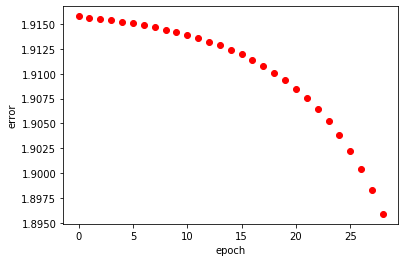

In [16]:
anf.plotErrors()

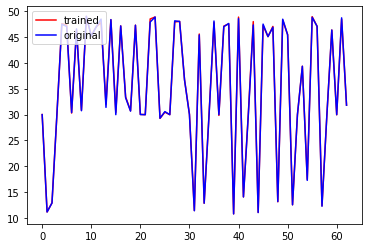

In [17]:
anf.plotResults()

In [18]:
X_train['Predicted GSTiming']=pred_train #Adding Predicted Data column to X_train.

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
X_train['GSTiming']=y_train #Adding original GSTiming column to X_train.

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
X_train #Final Dataset comaparing original GSTiming with Predicted GSTiming.

,Arriving Vehicle,Queueing Vehicle,Fog,Predicted GSTiming,GSTiming
42,33,34,476,30.021137,30.000000
67,82,14,399,11.146895,11.142857
20,17,5,447,12.907846,12.882353
58,1,39,147,29.952210,30.000000
77,36,59,361,47.642019,47.531951
92,63,69,475,47.413734,47.079108
74,18,85,432,30.313761,30.410572
4,48,94,377,46.451899,46.621701
76,21,45,385,30.864744,30.763196
88,64,81,117,49.028079,49.070661
